## Classification

Nearest Neighbours

In [38]:
import matplotlib
path_data = 'C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
%matplotlib inline
plt.style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D

In [39]:

def standard_units(x):
    return (x - np.mean(x))/np.std(x)

In [40]:

def distance(point1, point2):
    """The distance between two arrays of numbers."""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, point):
    """The distance between p (an array of numbers) and the numbers in row i of attribute_table."""
    attributes = training.drop('Class', axis=1)
    def distance_from_point(row):
        return distance(np.array(row),point)
    distances_from_point = []
    for i in range(len(attributes)) : 
        distances_from_point.append(distance_from_point(attributes.loc[i]))
    #print(distances_from_point)
    return np.array(distances_from_point)
    #return attributes.apply(distance_from_point)

def table_with_distances(training, point):
    """A copy of the training table with the distance from each row to array p."""
    a =training.copy()
    a['Distance'] = all_distances(training, point)
    return a

def closest(training, point, k):
    """A table containing the k closest rows in the training table to array p."""
    with_dists = table_with_distances(training, point)
    sorted_by_distance = with_dists.sort_values('Distance').reset_index(drop= True)
    topk = sorted_by_distance.head(k)
    #print(topk)
    return topk

def majority(topkclasses):
    """1 if the majority of the "Class" column is 1s, and 0 otherwise."""
    ones = len(topkclasses[topkclasses['Class'] == 1])
    zeros = len(topkclasses[topkclasses['Class']== 0])
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, p, k):
    """Classify an example with attributes p using k-nearest neighbor classification with the given training table."""
    closestk = closest(training, p, k)
    topkclasses = closestk[['Class']]
    return majority(topkclasses)

In [41]:
ckd = pd.read_csv(path_data + 'ckd.csv')
ckd.rename(columns={"Blood Glucose Random":"Glucose"},inplace=True)
ckd

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,0
154,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,0
155,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,0
156,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,0


In [42]:
ckd = pd.DataFrame({
    'Hemoglobin': standard_units(ckd['Hemoglobin']),
    'Glucose': standard_units(ckd['Glucose']),
    'White Blood Cell Count': standard_units(ckd['White Blood Cell Count']),
    'Class': ckd['Class']
})

In [43]:
ckd

,Hemoglobin,Glucose,White Blood Cell Count,Class
0,-0.865744,-0.221549,-0.569768,1
1,-1.457446,-0.947597,1.162684,1
2,-1.004968,3.841231,-1.275582,1
3,-2.814879,0.396364,0.809777,1
4,-2.083954,0.643529,0.232293,1
...,...,...,...,...
153,0.700526,0.133751,-0.569768,0
154,0.978974,-0.870358,-0.216861,0
155,0.735332,-0.484162,-0.601850,0
156,0.178436,-0.267893,-0.409356,0


In [44]:
color_table = pd.DataFrame({
    'Class': [1, 0],
    'Color': ['darkblue', 'gold']
})
color_table

,Class,Color
0,1,darkblue
1,0,gold


In [45]:
ckd = ckd.merge(color_table,on="Class")
ckd

,Hemoglobin,Glucose,White Blood Cell Count,Class,Color
0,-0.865744,-0.221549,-0.569768,1,darkblue
1,-1.457446,-0.947597,1.162684,1,darkblue
2,-1.004968,3.841231,-1.275582,1,darkblue
3,-2.814879,0.396364,0.809777,1,darkblue
4,-2.083954,0.643529,0.232293,1,darkblue
...,...,...,...,...,...
153,0.700526,0.133751,-0.569768,0,gold
154,0.978974,-0.870358,-0.216861,0,gold
155,0.735332,-0.484162,-0.601850,0,gold
156,0.178436,-0.267893,-0.409356,0,gold


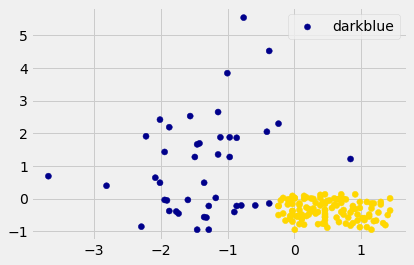

In [46]:
ckd.groupby(by='Color')
plt.scatter(ckd['Hemoglobin'], ckd['Glucose'],color=ckd['Color'])
plt.legend(['darkblue', 'gold'])


### A Nearest Neighbor Classifier ###

In [47]:
def show_closest(point):
    """point = array([x,y]) 
    gives the coordinates of a new point
    shown in red"""
    
    HemoGl = ckd.drop(columns=['White Blood Cell Count', 'Color'], axis =1)
    #print(HemoGl)
    t = closest(HemoGl, point, 1)
    x_closest = t.iloc[0, 0]
    y_closest = t.iloc[0, 1]
    ckd.plot.scatter('Hemoglobin', 'Glucose', color = ckd['Color'])
    plt.scatter(point[0], point[1], color='red', s=30)
    plt.plot(np.array((point[0], x_closest)), np.array((point[1], y_closest)), color='k', lw=2);

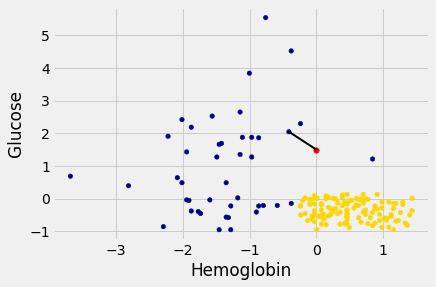

In [48]:
# In this example, Alice's Hemoglobin attribute is 0 and her Glucose is 1.5.
alice = [0, 1.5]
show_closest(alice)

### Decision boundary ###

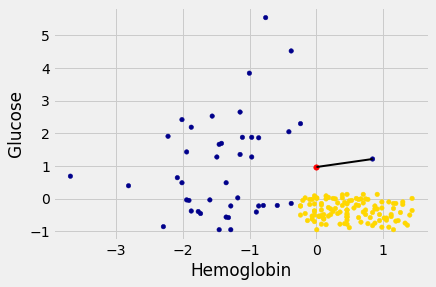

In [49]:
alice = [0, 0.97]
show_closest(alice)

Here are hundreds of new unclassified points, all in red.

In [50]:

x_array = []
y_array = []
for x in np.arange(-2, 2.1, 0.1):
    for y in np.arange(-2, 2.1, 0.1):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)
        
test_grid = pd.DataFrame({
    'Hemoglobin': x_array,
    'Glucose': y_array
})

Text(0.5, 0, 'Hemoglobin')

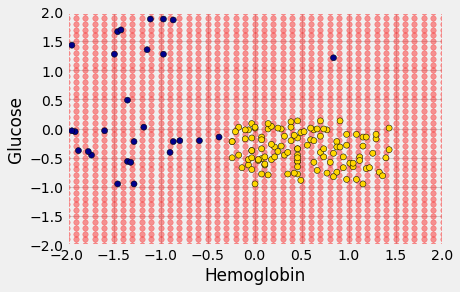

In [51]:

plt.scatter(test_grid['Hemoglobin'], test_grid['Glucose'], color='red', alpha=0.4, s=30)

plt.scatter(ckd['Hemoglobin'], ckd['Glucose'], c=ckd['Color'], edgecolor='k')

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.ylabel("Glucose")
plt.xlabel("Hemoglobin")

In [52]:

def classify_grid(training, test, k):
    c = np.array([])
    for i in range(test.shape[0]):
        # Run the classifier on the ith patient in the test set
        c = np.append(c, classify(training, np.array(test.loc[i]), k))
    print(c)
    return c

In [53]:

c = classify_grid(ckd.drop(columns=['White Blood Cell Count', 'Color']), test_grid, 1)

[1. 1. 1. ... 1. 1. 1.]


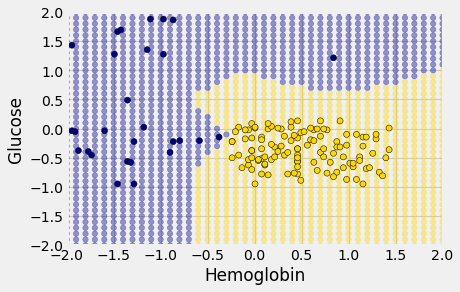

In [54]:
test_grid['Class'] = c
test_grid = pd.merge(test_grid, color_table, on='Class', how='inner')
test_grid.plot.scatter('Hemoglobin', 'Glucose', color = test_grid['Color'], alpha=0.4, s=30)
plt.scatter(ckd['Hemoglobin'], ckd['Glucose'], color = ckd['Color'], edgecolor='k')
plt.xlabel('Hemoglobin')
plt.ylabel('Glucose')
#plt.legend("Colour=Dark Blue","Color=Gold")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

### k-Nearest Neighbors ###

Text(0, 0.5, 'Glucose')

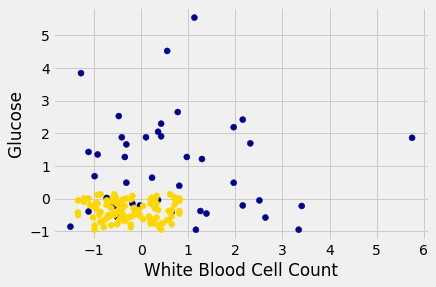

In [55]:
plt.scatter(ckd['White Blood Cell Count'], ckd['Glucose'], color = ckd['Color'])
plt.xlabel("White Blood Cell Count")
plt.ylabel("Glucose")

### Training and Testing ###

Overly Optimistic "Testing"

<AxesSubplot:xlabel='White Blood Cell Count', ylabel='Glucose'>

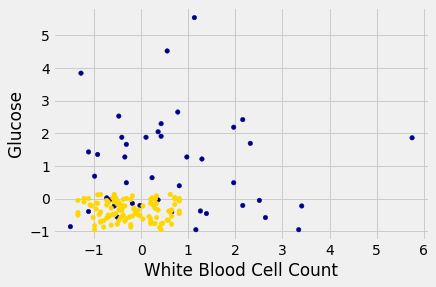

In [56]:
ckd.plot.scatter('White Blood Cell Count', 'Glucose', color=ckd['Color'])

In [57]:
shuffled_ckd = ckd.sample(len(ckd), replace=False).reset_index(drop=True)
training = shuffled_ckd.head(79)
testing = shuffled_ckd.tail(79)

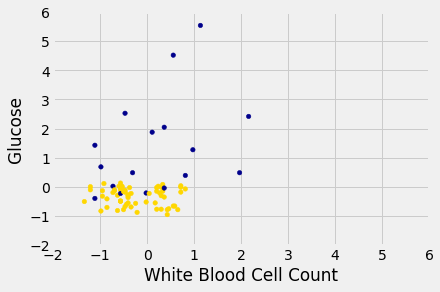

In [58]:
training.plot.scatter('White Blood Cell Count', 'Glucose', color = training['Color'])
plt.xlim(-2, 6)
plt.ylim(-2, 6);

In [59]:
x_array = np.array([])
y_array = np.array([])
for x in np.arange(-2, 6.1, 0.25):
    for y in np.arange(-2, 6.1, 0.25):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)
        
test_grid = pd.DataFrame({'Glucose': x_array,
                          'White Blood Cell Count': y_array})

In [60]:
test_grid

,Glucose,White Blood Cell Count
0,-2.0,-2.00
1,-2.0,-1.75
2,-2.0,-1.50
3,-2.0,-1.25
4,-2.0,-1.00
...,...,...
1084,6.0,5.00
1085,6.0,5.25
1086,6.0,5.50
1087,6.0,5.75


In [61]:
c = classify_grid(training.drop(['Hemoglobin', 'Color'], axis = 1), test_grid, 1)

[0. 0. 0. ... 1. 1. 1.]


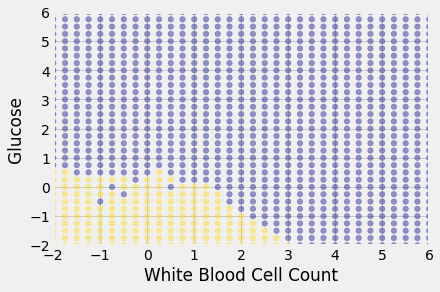

In [62]:
test_grid['Class'] = c
test_grid= pd.merge(test_grid, color_table, on = 'Class', how='inner')
test_grid.plot.scatter('White Blood Cell Count', 'Glucose', color = test_grid['Color'], alpha=0.4, s=30)
plt.xlim(-2, 6)
plt.ylim(-2, 6);

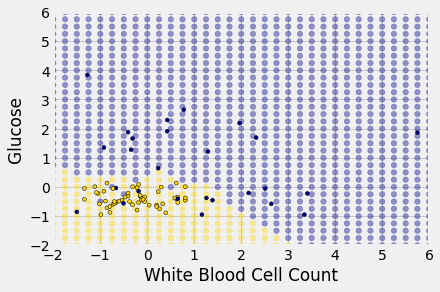

In [63]:
test_grid.plot.scatter('White Blood Cell Count', 'Glucose', color = test_grid['Color'], alpha=0.4, s=30)
plt.scatter(testing['White Blood Cell Count'], testing['Glucose'], color=testing['Color'], s=15, edgecolor='k')
plt.xlim(-2, 6)
plt.ylim(-2, 6);
plt.show()

### Rows of Tables ###

In [64]:
ckd=pd.read_csv(path_data + 'ckd.csv')
ckd.rename(columns={'Blood Glucose Random': 'Glucose'},inplace=True)
ckd


,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,0
154,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,0
155,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,0
156,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,0


In [65]:
ckd.iloc[0,:]

Age                                48
Blood Pressure                     70
Specific Gravity                1.005
Albumin                             4
Sugar                               0
Red Blood Cells                normal
Pus Cell                     abnormal
Pus Cell clumps               present
Bacteria                   notpresent
Glucose                           117
Blood Urea                         56
Serum Creatinine                  3.8
Sodium                            111
Potassium                         2.5
Hemoglobin                       11.2
Packed Cell Volume                 32
White Blood Cell Count           6700
Red Blood Cell Count              3.9
Hypertension                      yes
Diabetes Mellitus                  no
Coronary Artery Disease            no
Appetite                         poor
Pedal Edema                       yes
Anemia                            yes
Class                               1
Name: 0, dtype: object

In [66]:
ckd.iloc[0,3]

4

### Converting Rows to Arrays (When Possible) ###

In [67]:
ckd = pd.DataFrame({
    'Hemoglobin': standard_units(ckd['Hemoglobin']),
    'Glucose': standard_units(ckd['Glucose']),
    'Class': ckd['Class']})

color_table = pd.DataFrame({
    'Class': np.array([1, 0]),
    'Color': np.array(['darkblue', 'gold'])})
ckd = pd.merge(ckd, color_table, on = 'Class', how = 'inner')
ckd

,Hemoglobin,Glucose,Class,Color
0,-0.865744,-0.221549,1,darkblue
1,-1.457446,-0.947597,1,darkblue
2,-1.004968,3.841231,1,darkblue
3,-2.814879,0.396364,1,darkblue
4,-2.083954,0.643529,1,darkblue
...,...,...,...,...
153,0.700526,0.133751,0,gold
154,0.978974,-0.870358,0,gold
155,0.735332,-0.484162,0,gold
156,0.178436,-0.267893,0,gold


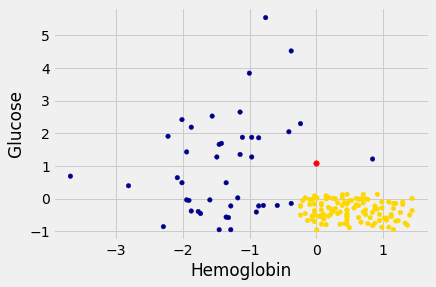

In [68]:
alice = np.array([0, 1.1])
ckd.plot.scatter('Hemoglobin', 'Glucose', color = ckd['Color'])
plt.scatter(alice[0], alice[1], color='red', s=30);

In [69]:
ckd_attributes = ckd[['Hemoglobin', 'Glucose']]

In [70]:
ckd_attributes

,Hemoglobin,Glucose
0,-0.865744,-0.221549
1,-1.457446,-0.947597
2,-1.004968,3.841231
3,-2.814879,0.396364
4,-2.083954,0.643529
...,...,...
153,0.700526,0.133751
154,0.978974,-0.870358
155,0.735332,-0.484162
156,0.178436,-0.267893


In [71]:
ckd_attributes.iloc[3,:]

Hemoglobin   -2.814879
Glucose       0.396364
Name: 3, dtype: float64

In [72]:
np.array(ckd_attributes.iloc[3,:])

array([-2.81487943,  0.39636401])

### Distance Between Points When There are Two Attributes ###

In [73]:
patient3 = np.array(ckd_attributes.loc[3])
alice, patient3

(array([0. , 1.1]), array([-2.81487943,  0.39636401]))

In [74]:
distance = np.sqrt(np.sum((alice - patient3)**2))
distance

2.901490965127261

In [75]:
def distance(point1, point2):
    """Returns the Euclidean distance between point1 and point2.
    
    Each argument is an array containing the coordinates of a point."""
    return np.sqrt(np.sum((point1 - point2)**2))

In [76]:
distance(alice, patient3)

2.901490965127261

### Using `apply` on an Entire Row ###

In [318]:
t = ckd_attributes.head(5)
t

,Hemoglobin,Glucose
0,-0.865744,-0.221549
1,-1.457446,-0.947597
2,-1.004968,3.841231
3,-2.814879,0.396364
4,-2.083954,0.643529


In [78]:
def max_abs(row):
    return np.max(np.abs(np.array(row)))

In [79]:
max_abs(t.iloc[4,:])

2.0839536249919064

In [80]:
t.apply(max_abs)

Hemoglobin    2.814879
Glucose       3.841231
dtype: float64

### Alice's $k$ Nearest Neighbors ###

In [81]:
alice

array([0. , 1.1])

In [82]:
def distance_from_alice(row):
    """Returns distance between Alice and a row of the attributes table"""
    return distance(alice, np.array(row))

In [83]:
distance_from_alice(ckd_attributes.iloc[3,:])

2.901490965127261

In [84]:
distances = [distance_from_alice(ckd_attributes.loc[i]) for i in range(len(ckd_attributes))]
ckd_with_distances = ckd_attributes.copy()
ckd_with_distances['Distance from Alice'] = distances

In [85]:
ckd_with_distances

,Hemoglobin,Glucose,Distance from Alice
0,-0.865744,-0.221549,1.579875
1,-1.457446,-0.947597,2.513325
2,-1.004968,3.841231,2.919641
3,-2.814879,0.396364,2.901491
4,-2.083954,0.643529,2.133361
...,...,...,...
153,0.700526,0.133751,1.193471
154,0.978974,-0.870358,2.200159
155,0.735332,-0.484162,1.746506
156,0.178436,-0.267893,1.379482


In [86]:
sorted_by_distance = ckd_with_distances.sort_values('Distance from Alice', ascending= True).reset_index(drop = True)
sorted_by_distance

,Hemoglobin,Glucose,Distance from Alice
0,0.839750,1.215099,0.847601
1,-0.970162,1.276890,0.986156
2,-0.030400,0.087407,1.013049
3,0.143630,0.087407,1.022728
4,-0.413266,2.049282,1.035338
...,...,...,...
153,-1.004968,3.841231,2.919641
154,-2.292790,-0.854910,3.013065
155,-0.378460,4.520935,3.441806
156,-3.685029,0.689873,3.707782


In [87]:
alice_5_nearest_neighbors = sorted_by_distance.head(5)
alice_5_nearest_neighbors

,Hemoglobin,Glucose,Distance from Alice
0,0.839750,1.215099,0.847601
1,-0.970162,1.276890,0.986156
2,-0.030400,0.087407,1.013049
3,0.143630,0.087407,1.022728
4,-0.413266,2.049282,1.035338


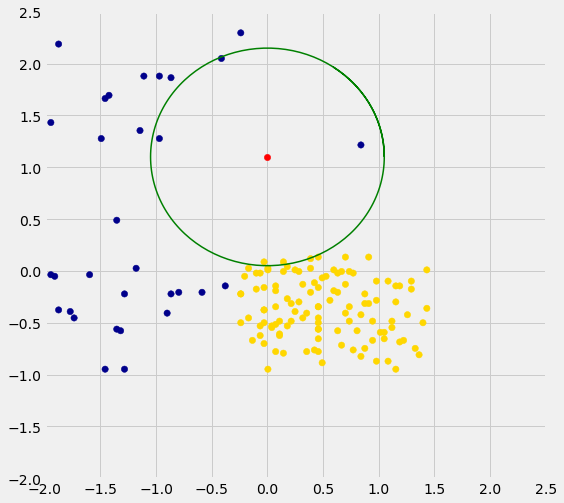

In [88]:
plt.figure(figsize=(8,8))
plt.scatter(ckd['Hemoglobin'], ckd['Glucose'], c=ckd['Color'], s=40)
plt.scatter(alice[0], alice[1], color='red', s=40)
radius = sorted_by_distance['Distance from Alice'][4]+0.014
theta = np.arange(0, 2*np.pi+1, 2*np.pi/200)
plt.plot(radius*np.cos(theta)+alice[0], radius*np.sin(theta)+alice[1], color='g', lw=1.5);
plt.xlim(-2, 2.5)
plt.ylim(-2, 2.5);

### Implementing the Classifier ###

### Banknote authentication

In [89]:
banknotes = pd.read_csv(path_data + 'banknote.csv')
banknotes

,WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [90]:
color_table = pd.DataFrame({'Class': np.array([1, 0]),
    'Color': np.array(['darkblue', 'gold'])})

In [91]:
banknotes = pd.merge(banknotes,color_table, on = 'Class', how = 'inner')

<AxesSubplot:xlabel='WaveletVar', ylabel='WaveletCurt'>

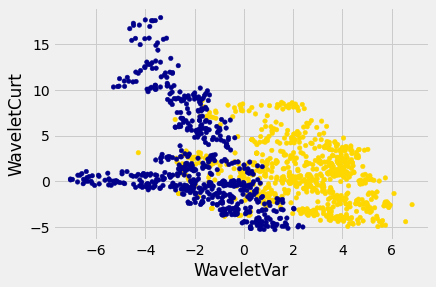

In [92]:
banknotes.plot.scatter('WaveletVar', 'WaveletCurt', color = banknotes['Color'])

<AxesSubplot:xlabel='WaveletSkew', ylabel='Entropy'>

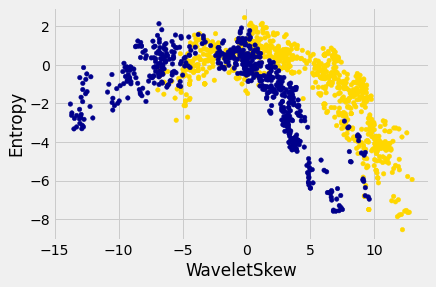

In [93]:
banknotes.plot.scatter('WaveletSkew', 'Entropy', color =banknotes['Color'])

### Multiple attributes

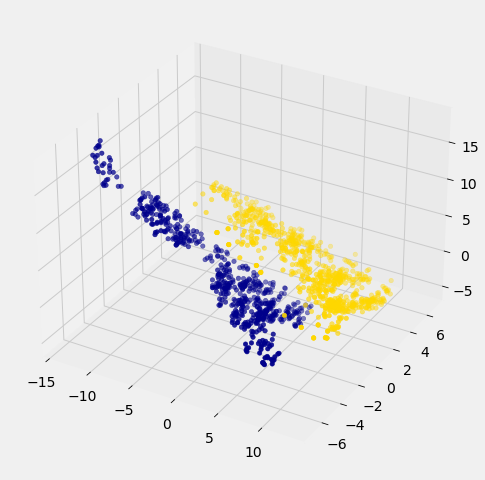

In [317]:
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(banknotes['WaveletSkew'], 
           banknotes['WaveletVar'], 
           banknotes['WaveletCurt'], 
           c=banknotes['Color']);
plt.show()

### Distance in Multiple Dimensions ###

In [95]:
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

In [96]:
wine = pd.read_csv(path_data + 'Wine.csv')

# For converting Class to binary

def is_one(x):
    if x == 1:
        return 1
    else:
        return 0
wine['Class']=wine['Class'].apply(is_one)
wine

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,0,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,0,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,0,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [97]:
wine_attributes = wine.drop(columns='Class', axis =1)

In [98]:
distance(np.array(wine_attributes.loc[0]), np.array(wine_attributes.loc[1]))

31.265012394048398

In [99]:
distance(np.array(wine_attributes.loc[0]), np.array(wine_attributes.loc[177]))

506.05936766351834

In [100]:
wine_with_colors = pd.merge(wine , color_table, on= 'Class', how = 'inner')
wine_with_colors

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline,Color
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,darkblue
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,darkblue
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,darkblue
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,darkblue
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,darkblue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,gold
174,0,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,gold
175,0,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,gold
176,0,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,gold


<AxesSubplot:xlabel='Flavanoids', ylabel='Alcohol'>

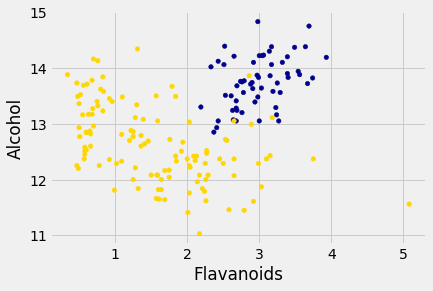

In [101]:
wine_with_colors.plot.scatter('Flavanoids', 'Alcohol', color=wine_with_colors['Color'])

<AxesSubplot:xlabel='Alcalinity of Ash', ylabel='Ash'>

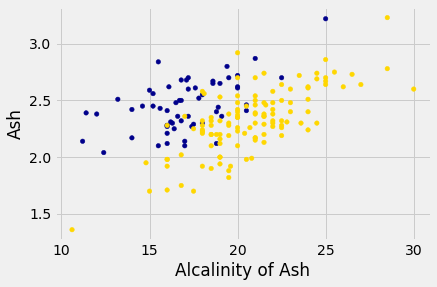

In [102]:
wine_with_colors.plot.scatter('Alcalinity of Ash', 'Ash', color=wine_with_colors['Color'])

<AxesSubplot:xlabel='Magnesium', ylabel='Total Phenols'>

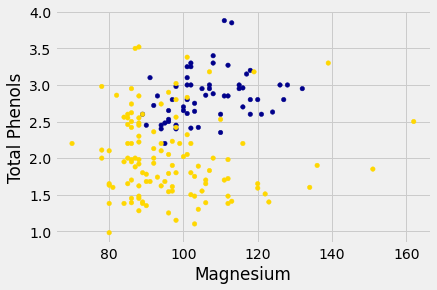

In [103]:
wine_with_colors.plot.scatter('Magnesium', 'Total Phenols', color=wine_with_colors['Color'])

### A Plan for the Implementation ###

In [104]:
def closest(training, p, k):
    """A table containing the k closest rows in the training table to array p."""
    with_dists = table_with_distances(training, point)
    sorted_by_distance = with_dists.sort_values('Distance').reset_index(drop= True)
    topk = sorted_by_distance.head(k)
    return topk

def majority(topkclasses):
    """1 if the majority of the "Class" column is 1s, and 0 otherwise."""
    ones = len(topkclasses[topkclasses['Class'] == 1])
    zeros = len(topkclasses[topkclasses['Class']== 0])
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, p, k):
    kclosest = closest(training, p, k)
    kclosest.classes = kclosest.select('Class')
    return majority(kclosest)

### Implementation Step 1 ###

In [105]:
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, point):
    """The distance between p (an array of numbers) and the numbers in row i of attribute_table."""
    attributes = training.drop('Class', axis=1)
    def distance_from_point(row):
        return distance(np.array(row),point)
    distances_from_point = []
    for i in range(len(attributes)) : 
        distances_from_point.append(distance_from_point(attributes.loc[i]))
    return np.array(distances_from_point)
    #return attributes.apply(distance_from_point)

def table_with_distances(training, point):
    """A copy of the training table with the distance from each row to array p."""
    a =training.copy()
    a['Distance'] = all_distances(training, point)
    return a

def closest(training, p, k):
    """A table containing the k closest rows in the training table to array p."""
    with_dists = table_with_distances(training, p)
    sorted_by_distance = with_dists.sort_values('Distance').reset_index(drop= True)
    topk = sorted_by_distance.head(k)
    return topk

def majority(topkclasses):
    """1 if the majority of the "Class" column is 1s, and 0 otherwise."""
    ones = len(topkclasses[topkclasses['Class'] == 1])
    zeros = len(topkclasses[topkclasses['Class']== 0])
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, p, k):
    kclosest = closest(training, p, k)
    kclosest.classes = kclosest[['Class']]
    return majority(kclosest)

In [106]:
special_wine = wine.drop('Class', axis=1).loc[0]
special_wine

Alcohol                           14.23
Malic Acid                         1.71
Ash                                2.43
Alcalinity of Ash                 15.60
Magnesium                        127.00
Total Phenols                      2.80
Flavanoids                         3.06
Nonflavanoid phenols               0.28
Proanthocyanins                    2.29
Color Intensity                    5.64
Hue                                1.04
OD280/OD315 of diulted wines       3.92
Proline                         1065.00
Name: 0, dtype: float64

In [107]:
closest(wine, special_wine, 5)

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline,Distance
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0.000000
1,1,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060,10.392805
2,1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,22.340748
3,1,14.10,2.02,2.40,18.8,103,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060,24.760232
4,1,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065,25.094663


### Implementation Steps 2 and 3 ###

In [108]:
classify(wine, special_wine, 5)

<ipython-input-105-85019745af97>:42: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  kclosest.classes = kclosest[['Class']]


1

In [109]:
special_wine = wine.drop('Class', axis=1).loc[177]
classify(wine, special_wine, 5)

<ipython-input-105-85019745af97>:42: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  kclosest.classes = kclosest[['Class']]


0

### The Accuracy of the Classifier ###

In [110]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

def distance(point1, point2):
    """The distance between two arrays of numbers."""
    #print(point1)
    #print(point2)
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, point):
    """The distance between p (an array of numbers) and the numbers in row i of attribute_df."""
    attributes = training.copy().reset_index(drop=True)
    del attributes['Class']
    def distance_from_point(row):
        return distance(point, np.array(row))
    distances_from_point = []
    for i in range(len(attributes)) : 
        distances_from_point.append(distance_from_point(attributes.loc[i]))
    return np.array(distances_from_point)
    #return attributes.apply(distance_from_point)

def df_with_distances(training, point):
    """A copy of the training table with the distance from each row to array p."""
    data = training.copy()
    data['Distance'] = all_distances(training, point)
    return data

def closest(training, point, k):
    """A df containing the k closest rows in the training df to array p."""
    with_dists = df_with_distances(training, point).copy()
    sorted_by_distance = with_dists.sort_values(by='Distance', ascending=True).reset_index(drop=True)
    #print(sorted_by_distance)
    topk = sorted_by_distance.head(k)
    return topk

def majority(topkclasses):
    """1 if the majority of the "Class" column is 1s, and 0 otherwise."""
    ones = topkclasses[topkclasses['Class'] == 1].shape[0]
    zeros = topkclasses[topkclasses['Class'] == 0].shape[0]
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, p, k):
    """Classify an example with attributes p using k-nearest neighbor classification with the given training df."""
    closestk = closest(training, p, k)
    topkclasses = closestk[['Class']]
    return majority(closestk)

In [111]:
wine = pd.read_csv(path_data + 'Wine.csv')

# For converting Class to binary

def is_one(x):
    if x == 1:
        return 1
    else:
        return 0

wine['Class'] = wine['Class'].apply(is_one)
wine = wine.set_index('Class').reset_index()
wine

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,0,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,0,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,0,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [112]:
shuffled_wine = wine.sample(len(wine), replace = False) 
training_set = shuffled_wine.head(89).reset_index(drop=True)
test_set  = shuffled_wine.tail(89).reset_index(drop=True)

In [113]:
training_set

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
0,0,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520
1,0,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502
2,1,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760
3,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
4,0,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0,12.34,2.45,2.46,21.0,98,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438
85,0,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
86,1,13.88,1.89,2.59,15.0,101,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095
87,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150


In [114]:
test_set

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
0,0,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580
1,1,14.02,1.68,2.21,16.0,96,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035
2,0,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
3,0,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
4,1,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
85,1,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990
86,0,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695
87,1,13.83,1.57,2.62,20.0,115,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130


In [115]:
def count_zero(array):
    """Counts the number of 0's in an array"""
    return len(array) - np.count_nonzero(array)

def count_equal(array1, array2):
    """Takes two numerical arrays of equal length
    and counts the indices where the two are equal"""
    return count_zero(array1 - array2)

def evaluate_accuracy(training, test, k):
    test_attributes = test.copy()
    del test_attributes['Class']
    def classify_testrow(row):
        return classify(training, row, k)
    c = []
    for i in range(len(test_attributes)) : 
        #print(attributes)
        c.append(classify_testrow(test_attributes.loc[i]))
    return count_equal(c, test['Class']) / test.shape[0]

In [116]:
evaluate_accuracy(training_set, test_set, 5)

0.8876404494382022

### Breast Cancer Diagnosis ###

In [117]:
patients = pd.read_csv(path_data + 'breast-cancer.csv')
patients = patients.drop('ID', axis =1)
patients

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1


In [118]:
color_table = pd.DataFrame({
    'Class': np.array([1, 0]),
    'Color': np.array(['darkblue', 'gold'])})
patients_with_colors = pd.merge(patients, color_table, on ="Class", how= 'inner')

<AxesSubplot:xlabel='Bland Chromatin', ylabel='Single Epithelial Cell Size'>

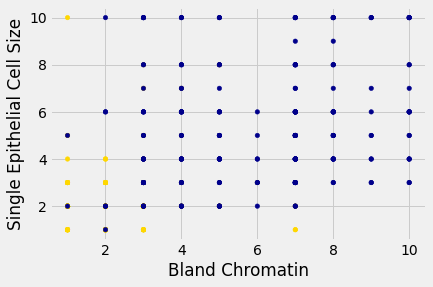

In [119]:
patients_with_colors.plot.scatter('Bland Chromatin', 'Single Epithelial Cell Size', color = patients_with_colors['Color'])

In [120]:
def randomize_column(a):
    return a + np.random.normal(0.0, 0.09, size=len(a))

data= pd.DataFrame({'Bland Chromatin (jittered)':  randomize_column(patients['Bland Chromatin']),
        'Single Epithelial Cell Size (jittered)':randomize_column(patients['Single Epithelial Cell Size']),
        'Class': patients['Class']})
data = pd.merge(data, color_table, on = 'Class', how='inner')
data

,Bland Chromatin (jittered),Single Epithelial Cell Size (jittered),Class,Color
0,2.853068,2.093158,0,gold
1,3.031436,7.044550,0,gold
2,3.052708,2.051928,0,gold
3,2.931662,3.028635,0,gold
4,3.015460,2.218899,0,gold
...,...,...,...,...
678,5.085428,4.153148,1,darkblue
679,4.103872,4.035944,1,darkblue
680,7.981101,7.032874,1,darkblue
681,10.132582,3.070988,1,darkblue


<AxesSubplot:xlabel='Bland Chromatin (jittered)', ylabel='Single Epithelial Cell Size (jittered)'>

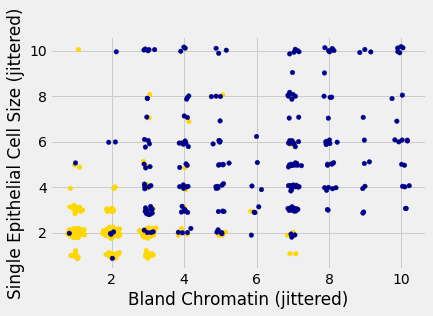

In [121]:
data.plot.scatter('Bland Chromatin (jittered)', 'Single Epithelial Cell Size (jittered)', color= data['Color'])

In [122]:
shuffled_patients = patients.sample(683, replace=False) 
training_set = shuffled_patients.head(342).reset_index(drop=True)
test_set  = shuffled_patients.tail(342).reset_index(drop=True)

In [123]:
evaluate_accuracy(training_set, test_set, 5)

0.9619883040935673